Shubhasmita Roy

# Exp 3 : Implementation of AND gate using Perceptron learning rule

### AND gate Implementation

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
er=[]

In [9]:
class Perceptron:
    def __init__(self, input_size, lr=1, epochs=100):
        self.W= np.zeros(input_size+1)
        # add for bias
        self.epochs = epochs
        self.lr = lr
    
    def activation(self, x):
        return 1 if x>=0 else 0
    
    def predict(self, x):
        z=self.W.T.dot(x)
        a = self.activation(z)
        return a
    
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e=d[i]-y
                self.W=self.W+self.lr*e*x
                er.append(e)

In [37]:
if __name__ == '__main__':
    X=np.array([[0,0],[0,1],[1,0],[1,1]])
    d=np.array([0,0,0,1])
    
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X,d)
    print(perceptron.W)
    
    ans="yes"
    while ans=="yes":
        x=int(input("Enter x: "))
        y=int(input("Enter y: "))
        Testdata=[1,x,y]
        Test0=perceptron.W.dot(Testdata)
        Testout = perceptron.activation(Test0)
        print("Output for AND :",Testout)
        ans=input("Do you want to continue? ")

[-3.  2.  1.]
Enter x: 1
Enter y: 1
Output for AND : 1
Do you want to continue? yes
Enter x: 0
Enter y: 0
Output for AND : 0
Do you want to continue? yes
Enter x: 1
Enter y: 0
Output for AND : 0
Do you want to continue? no


In [38]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [39]:
d

array([0, 0, 0, 1])

#### Squared error

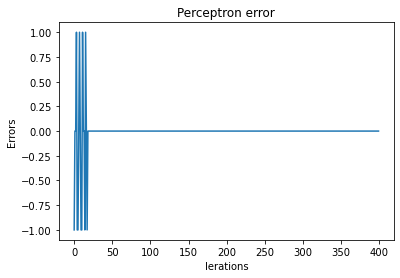

In [42]:
plt.plot(er)
plt.title('Perceptron error')
plt.xlabel('Ierations')
plt.ylabel('Errors')
plt.show()

### OR gate Implementation

In [6]:
if __name__ == '__main__':
    X=np.array([[0,0],[0,1],[1,0],[1,1]])
    d=np.array([0,1,1,1])
    
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X,d)
    print(perceptron.W)
    
    ans="yes"
    while ans=="yes":
        x=int(input("Enter x: "))
        y=int(input("Enter y: "))
        Testdata=[1,x,y]
        Test0=perceptron.W.dot(Testdata)
        Testout = perceptron.activation(Test0)
        print("Output for OR :",Testout)
        ans=input("Do you want to continue? ")

[-1.  1.  1.]
Enter x: 0
Enter y: 1
Output for OR : 1
Do you want to continue? yes
Enter x: 1
Enter y: 1
Output for OR : 1
Do you want to continue? yes
Enter x: 0
Enter y: 0
Output for OR : 0
Do you want to continue? no


#### Error Decresing

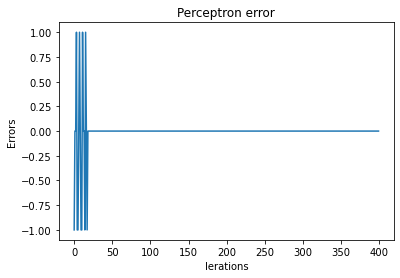

In [43]:
plt.plot(er)
plt.title('Perceptron error')
plt.xlabel('Ierations')
plt.ylabel('Errors')
plt.show()

### IRIS flower classification

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Creating appropriate dataset

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df1=df[df.target==1] #versicolor
df2=df[df.target==0] #setosa

In [5]:
#setosa's head
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# versicolor's head
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


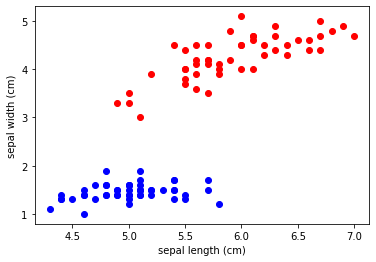

In [10]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df1['sepal length (cm)'], df1['petal length (cm)'], color="red")
plt.scatter(df2['sepal length (cm)'], df2['petal length (cm)'], color="blue")

In [11]:
# creating an array
X1=df2[['sepal length (cm)','petal length (cm)']].append(df1[['sepal length (cm)','petal length (cm)']], ignore_index=True)
X=X1.to_numpy()
d1=df2.target.append(df1.target, ignore_index=True)
d=d1.to_numpy()

In [12]:
if __name__ == '__main__':
    #X=np.array([[0,0],[0,1],[1,0],[1,1]])
    #d=np.array([0,1,1,1])
    X1=df2[['sepal length (cm)','petal length (cm)']].append(df1[['sepal length (cm)','petal length (cm)']], ignore_index=True)
    X=X1.to_numpy()
    d1=df2.target.append(df1.target, ignore_index=True)
    d=d1.to_numpy()
    
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X,d)
    print(perceptron.W)
    
    ans="yes"
    while ans=="yes":
        x=float(input("Enter x: "))
        y=float(input("Enter y: "))
        Testdata=[1,x,y]
        Test0=perceptron.W.dot(Testdata)
        Testout = perceptron.activation(Test0)
        print("Output for OR :",Testout)
        ans=input("Do you want to continue? ")

[-2.  -3.4  9.1]
Enter x: 7.0
Enter y: 4.7
Output for OR : 1
Do you want to continue? yes
Enter x: 5.1
Enter y: 1.4
Output for OR : 0
Do you want to continue? no


#### Squared error

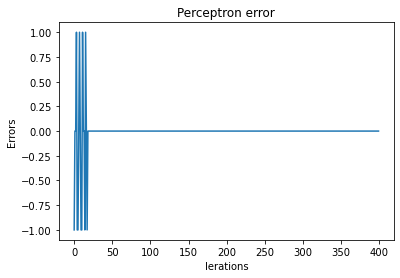

In [44]:
plt.plot(er)
plt.title('Perceptron error')
plt.xlabel('Ierations')
plt.ylabel('Errors')
plt.show()